In [20]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

In [2]:
tf.__version__

'2.9.1'

In [3]:
# !pip install imageio
# !pip install git+https://github.com/tensorflow/docs

In [4]:
(train_images, train_labels), (_,_) = tf.keras.datasets.mnist.load_data()

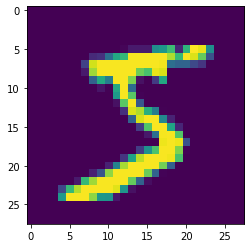

In [5]:
plt.imshow(train_images[0])

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_images)

60000

In [8]:
train_images.reshape(train_images.shape[0], 28, 28, 1).shape

(60000, 28, 28, 1)

In [9]:
# print(train_images)

In [10]:
# train_images.reshape(train_images.shape[0], 28, 28, 1)

In [11]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')

In [12]:
half_size = np.max(train_images)/2
train_images = (train_images - half_size) / half_size

In [13]:
# train_images

In [14]:
np.max(train_images)

1.0

In [15]:
BUFFER_SIZE = train_images.shape[0]
BATCH_SIZE = 256

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [17]:
len(train_dataset)

235

In [21]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7,7,256)))
    assert model.output_shape == (None, 7, 7, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

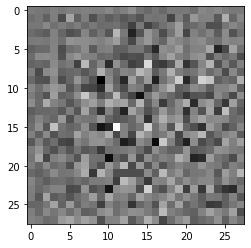

In [55]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [50]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5,5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [67]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.00299082]], shape=(1, 1), dtype=float32)
